# In this notebook we show the creation of linked datase step by step 

In [2]:
from pathlib import Path
import pandas as pd
from mappings import Mappings
from ontology import Ontology
from dataset import Dataset

In [3]:
data_dir = Path('../../../data/examples')

In [4]:
trans_data = data_dir/'sample1_modified.csv'
config1 = data_dir/'sample1_mapping.yml'
ont_file = Path.cwd()/'infection_trans.owl'

## Here is the schema of Infection Transmission Ontology

### We map the data from the dataset to the ontology 

#### Each column in the dataset correspond to a property of some concept in the ontology

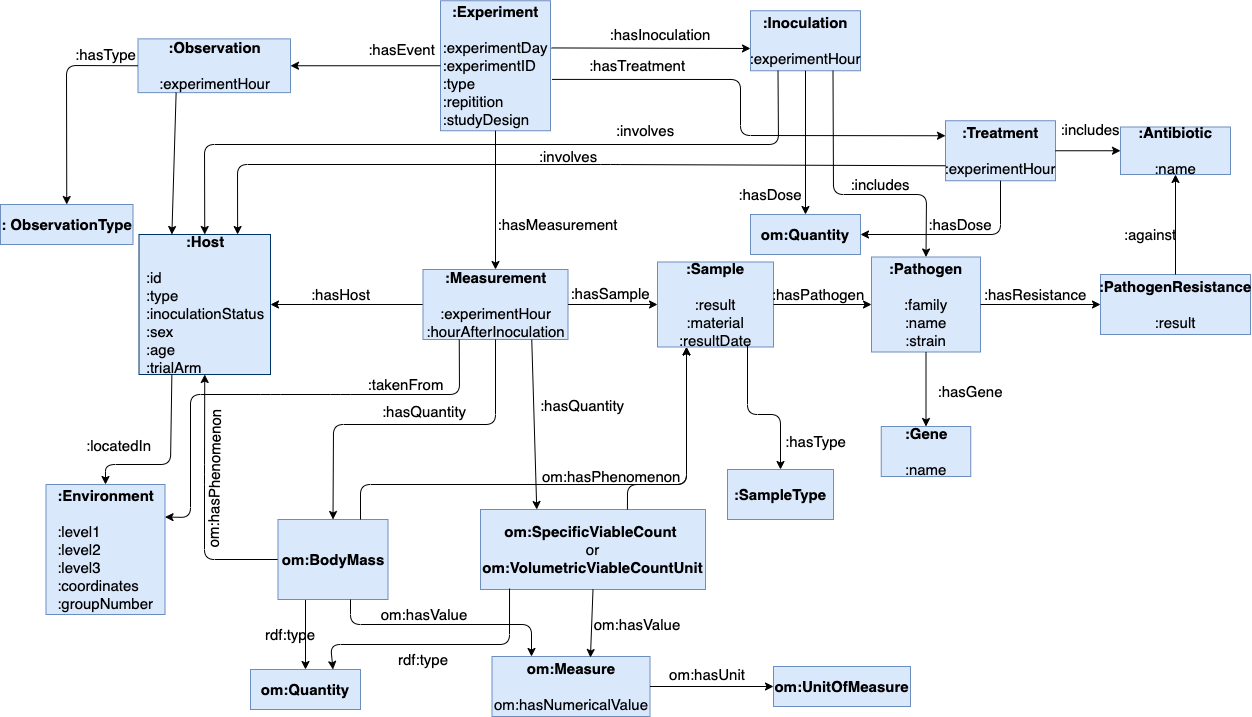

In [5]:
mappings = Mappings(config1)
dataset = Dataset(str(trans_data), mappings)

In [6]:
ontology = Ontology(ont_file)

#### Dataset after preprocessing step. 
#### For preprocessing step explanation check the [notebook](http://127.0.0.1:8888/notebooks/src/create_ontology/map_ontology/summerfair-manual.ipynb) 

In [7]:
dataset.tidy_dataset


,chicken_id,house,pen,sex,type,experimentDay,experimentHour,sample.*_result
0,12345,1,10,F,I,3,12:00,-
1,12345,1,10,F,I,4,12:00,-
2,12345,1,10,F,I,4,16:00,+


### For every row of the dataset we populate the ontology based on mapping file

In [8]:
mappings.ont_mappings

{'Experiment': {'experimentID': 'UU', 'experimentDay': 'experimentDay'},
 'Environment': {'level2': 'house', 'level1': 'pen'},
 'Host': {'id': 'chicken_id',
  'inoculationStatus': 'type',
  'sex': 'sex',
  'locatedIn': 'Environment'},
 'Measurement': [{'experimentDay': 'sample.*_day',
   'experimentHour': 'experimentHour',
   'hasHost': 'Host',
   'Sample': {'hasType': 'Swab', 'result': 'sample.*_result'},
   'Pathogen': {'name': 'E.Coli'}}]}

### For each row we create concpets and theirs properties and relations with an existing concepts

In [9]:
for _, row in dataset.tidy_dataset.iloc[:1].iterrows():
        ontology.populate_ontology(mappings, row)

#### Let use create concepts step by step for first row in the dataset

In [10]:
dataset.tidy_dataset.iloc[:1]

,chicken_id,house,pen,sex,type,experimentDay,experimentHour,sample.*_result
0,12345,1,10,F,I,3,12:00,-


In [11]:
ontology.individuals_per_row['Host'].properties

{'id': 12345,
 'inoculationStatus': 'I',
 'sex': 'F',
 'uri': rdflib.term.URIRef('http://www.purl.org/infection_trans#Host_12345')}

In [12]:
# Removing Uris from propertiesa to simplify the example
# This should be ignored by users 
for key in ontology.individuals_per_row.keys():
    del ontology.individuals_per_row[key].properties['uri']
    

In [13]:
mappings.ont_mappings['Experiment']

{'experimentID': 'UU', 'experimentDay': 'experimentDay'}

In [14]:

ontology.individuals_per_row['Experiment'].properties

{'experimentID': 'UU', 'experimentDay': 3}

In [15]:
ontology.individuals_per_row['Environment'].properties

{'level2': 1, 'level1': 10}

In [16]:
ontology.individuals_per_row['Host'].properties

{'id': 12345, 'inoculationStatus': 'I', 'sex': 'F'}

#### The measurement in the ontology has property experimentHour. The experimentDay (property of the Experiment) is included in order to know to which experiment relate the Measurement.

####  The Measurement has some dependent classes, Host, Sample and Pathogen. In one row we can have multiple measurements with differents samples and pathogens. By placing related classes under the Measurement in the mapping file we know which columns are related to each other. 

In [17]:
mappings.ont_mappings['Measurement']

[{'experimentDay': 'sample.*_day',
  'experimentHour': 'experimentHour',
  'hasHost': 'Host',
  'Sample': {'hasType': 'Swab', 'result': 'sample.*_result'},
  'Pathogen': {'name': 'E.Coli'}}]

In [18]:
ontology.individuals_per_row['Pathogen'].properties

{'name': 'E.Coli'}

In [19]:
ontology.individuals_per_row['Sample'].properties

{'result': '-'}

In [22]:
ontology.individuals_per_row['Measurement'].properties

{'experimentHour': '12:00'}

## The final graph for first row is the following: